In [3]:
setwd("..")

In [41]:
library(tidyverse)
library(forcats)
library(arcadiathemeR)

In [96]:
# set colors from primary palette that look good in the orders they appear in the plot
virus_colors <- c(
  "Adenoviridae" = "#F898AE",
  "Astroviridae" = "#73B5E3",
  "Herpesviridae" = "#FFB984",
  "Caliciviridae" = "#F5E4BE",
  "Poxviridae" = "#BABEE0",
  "Picornaviridae" = "#97CD78",
  "Potyviridae" = "#5088C5",
  "Coronaviridae" = "#F28360"
)

In [4]:
filter_criteria1 <- read_csv("outputs/viral/all_nomburg_virus_matches_with_metadata_filtered_criteria1.csv", show_col_types = FALSE) %>%
  mutate(host_organism = gsub(" \\(.*", "", host_organism)) %>%
  filter(host_organism == "Homo sapiens")

In [12]:
# double check there are no duplicate queries; filter criteria 1 should select only the top hit for each query.
length(unique(filter_criteria1$query)) == nrow(filter_criteria1)

[1] TRUE

## Number of hits etc

In [70]:
# how many hits?
nrow(filter_criteria1)

[1] 335

In [109]:
length(unique(filter_criteria1$query_virus))

[1] 47

In [71]:
length(unique(filter_criteria1$host_gene_names_primary))

[1] 116

In [95]:
unique(filter_criteria1$query_family)

[1] "Poxviridae"     "Astroviridae"   "Picornaviridae" "Herpesviridae" 
[5] "Adenoviridae"   "Potyviridae"    "Coronaviridae"  "Caliciviridae"

In [67]:
# keep anything with 3 hits
top_hit <- filter_criteria1 %>%
  group_by(host_gene_names_primary) %>%
  tally() %>%
  arrange(desc(n)) %>%
  filter(n > 2)

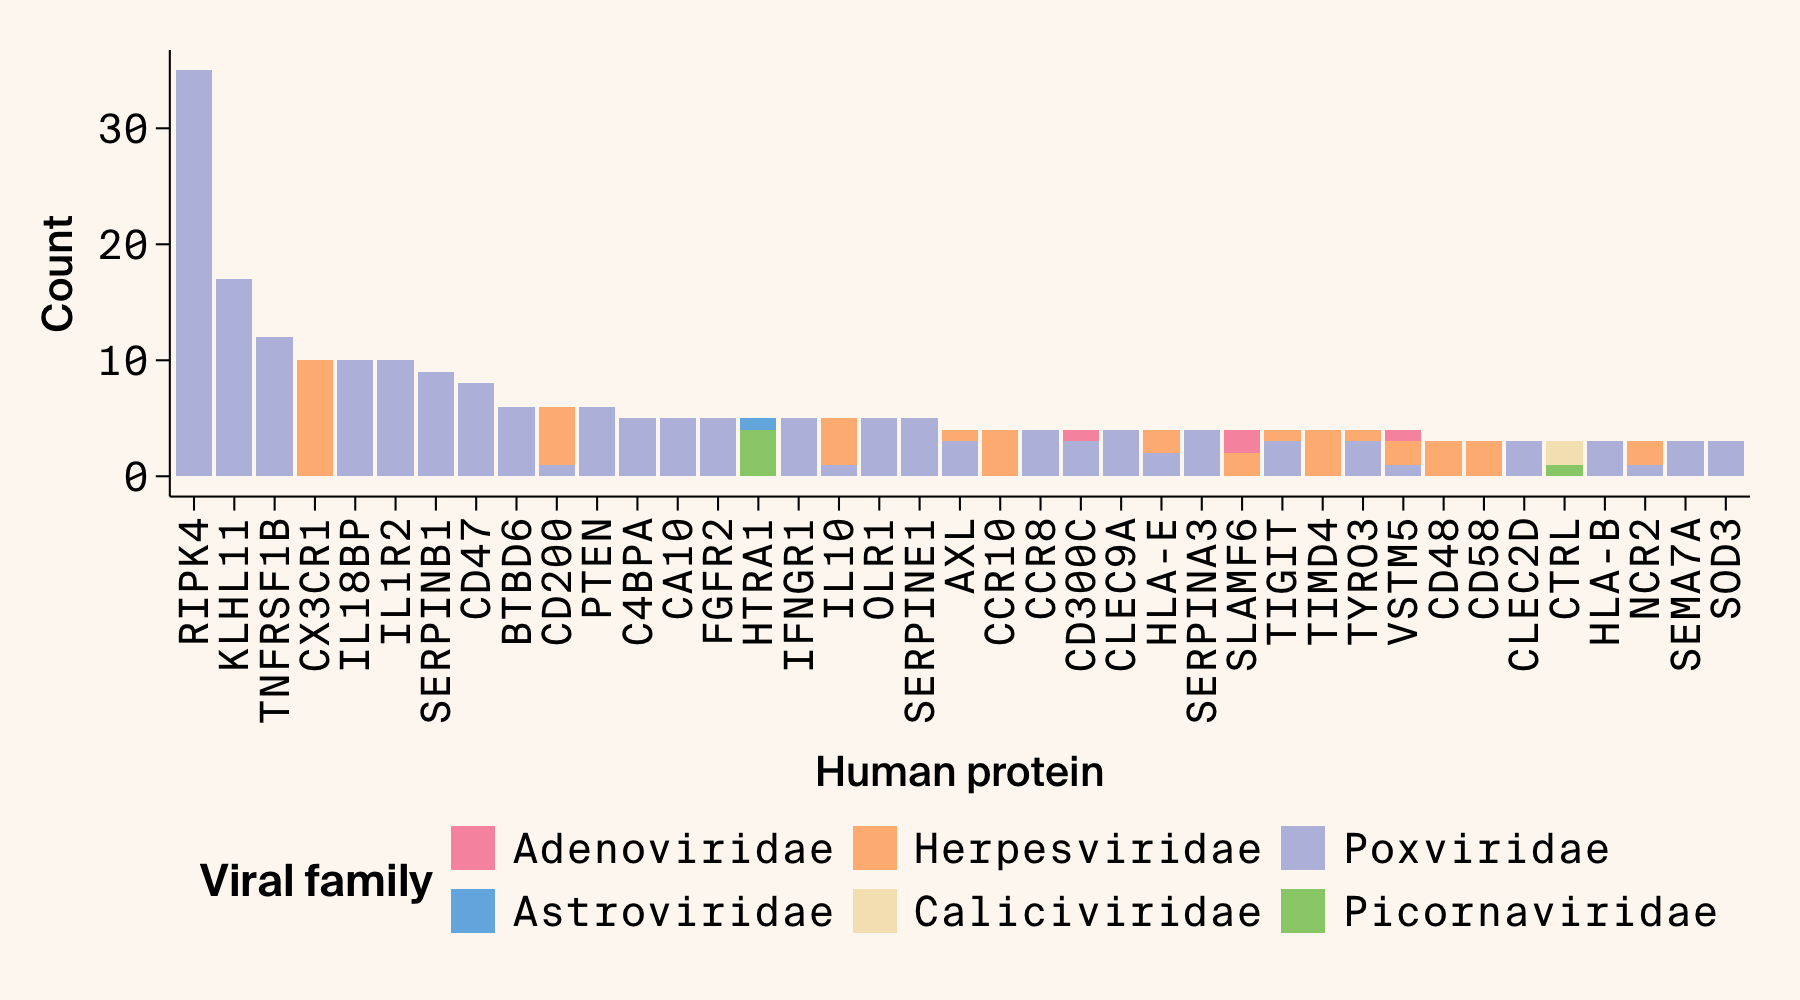

In [97]:
options(repr.plot.width = 9, repr.plot.height = 5, repr.plot.res = 200)

ggplot(filter_criteria1 %>% filter(host_gene_names_primary %in% top_hit$host_gene_names_primary),
       aes(x = fct_infreq(host_gene_names_primary), fill = query_family)) +
  geom_bar() +
  theme_arcadia() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = .5),
        legend.position = "bottom") +
  #scale_fill_arcadia() +
  labs(x = "Human protein", y = "Count",  fill = "Viral family") +
  scale_fill_manual(values = virus_colors,
    #values = arcadia_palette("primary")[6:11],
    breaks = c("Adenoviridae", "Astroviridae", "Herpesviridae", "Caliciviridae", "Poxviridae",  "Picornaviridae"),
    labels = c("Adenoviridae", "Astroviridae", "Herpesviridae", "Caliciviridae", "Poxviridae",  "Picornaviridae")
  )

In [50]:
arcadiathemeR::arcadia_palette("primary")

[1] "#5088C5" "#F28360" "#3B9886" "#F7B846" "#7A77AB" "#F898AE" "#73B5E3"
 [8] "#FFB984" "#F5E4BE" "#BABEE0" "#97CD78" "#C85152"

## Show immune and mouse phenotype information

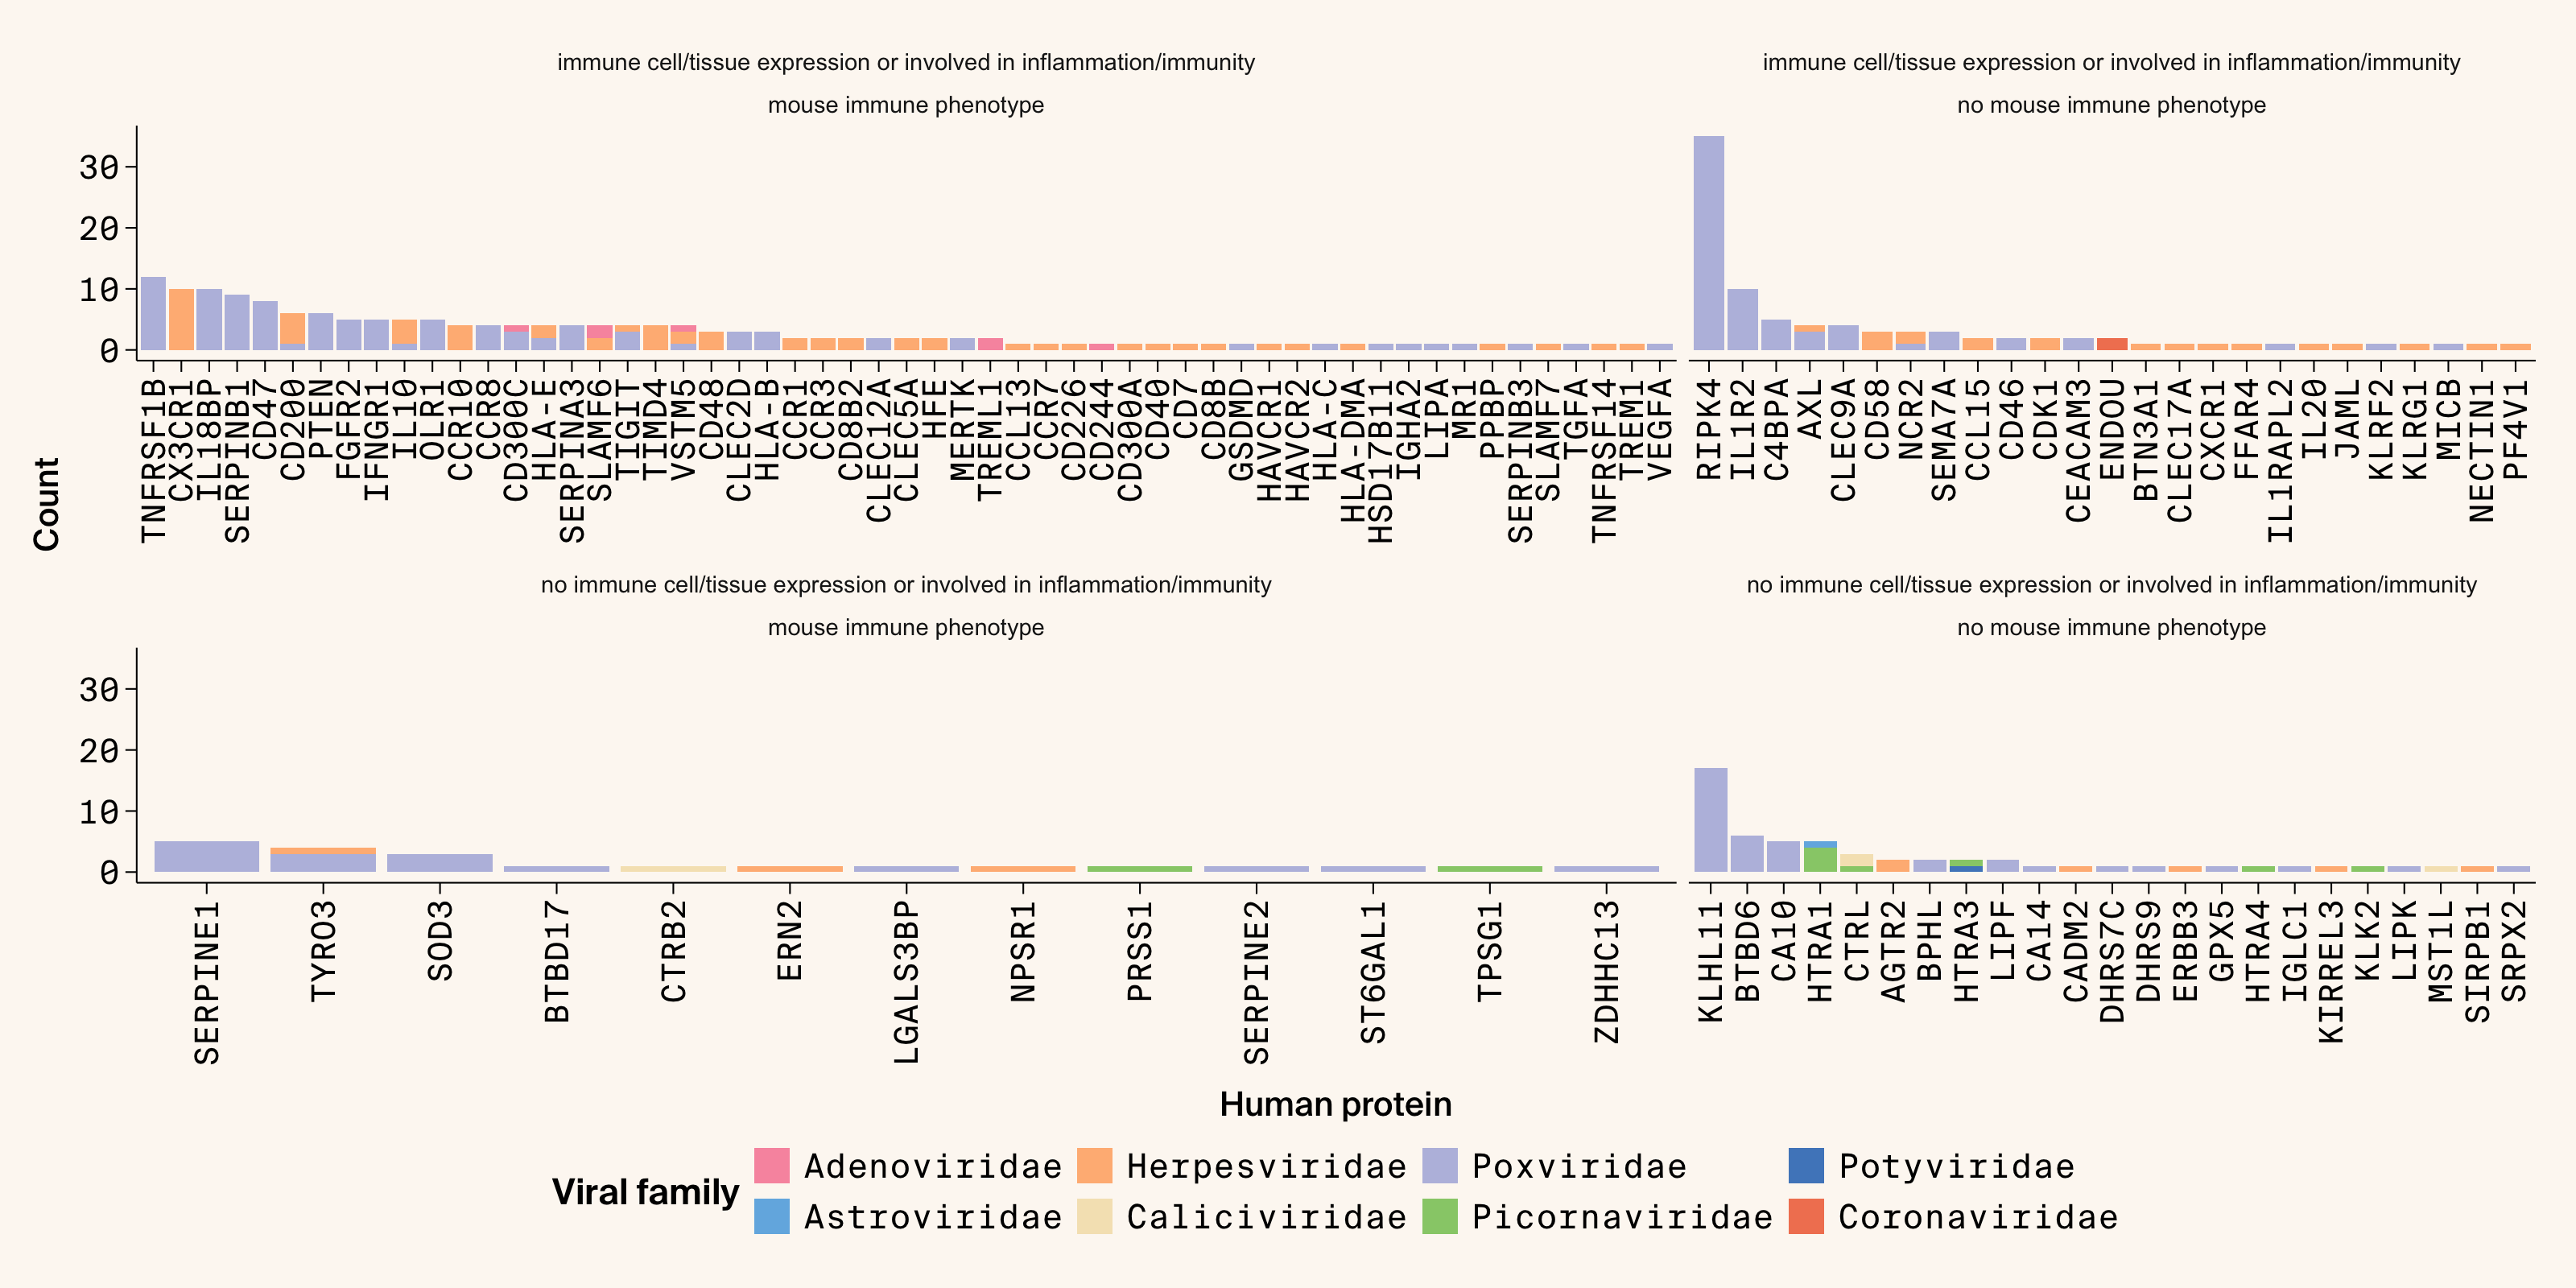

In [108]:
options(repr.plot.width = 16, repr.plot.height = 8, repr.plot.res = 200)
library(ggh4x)

ggplot(filter_criteria1, aes(x = fct_infreq(host_gene_names_primary), fill = query_family)) +
  geom_bar() +
  facet_wrap(~immune_involvement ~ mouse_immune_phenotype, scales = "free_x") +
  force_panelsizes(cols = c(1, 0.55)) +
  theme_arcadia() +
  scale_fill_manual(values = virus_colors,
                    breaks = c("Adenoviridae", "Astroviridae", "Herpesviridae", "Caliciviridae", "Poxviridae",  "Picornaviridae", "Potyviridae", "Coronaviridae"),
                    labels = c("Adenoviridae", "Astroviridae", "Herpesviridae", "Caliciviridae", "Poxviridae",  "Picornaviridae", "Potyviridae", "Coronaviridae")) + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = .5),
        legend.position = "bottom",
        strip.text = element_text(size = 10.5)) +
  labs(x = "Human protein", y = "Count",  fill = "Viral family")


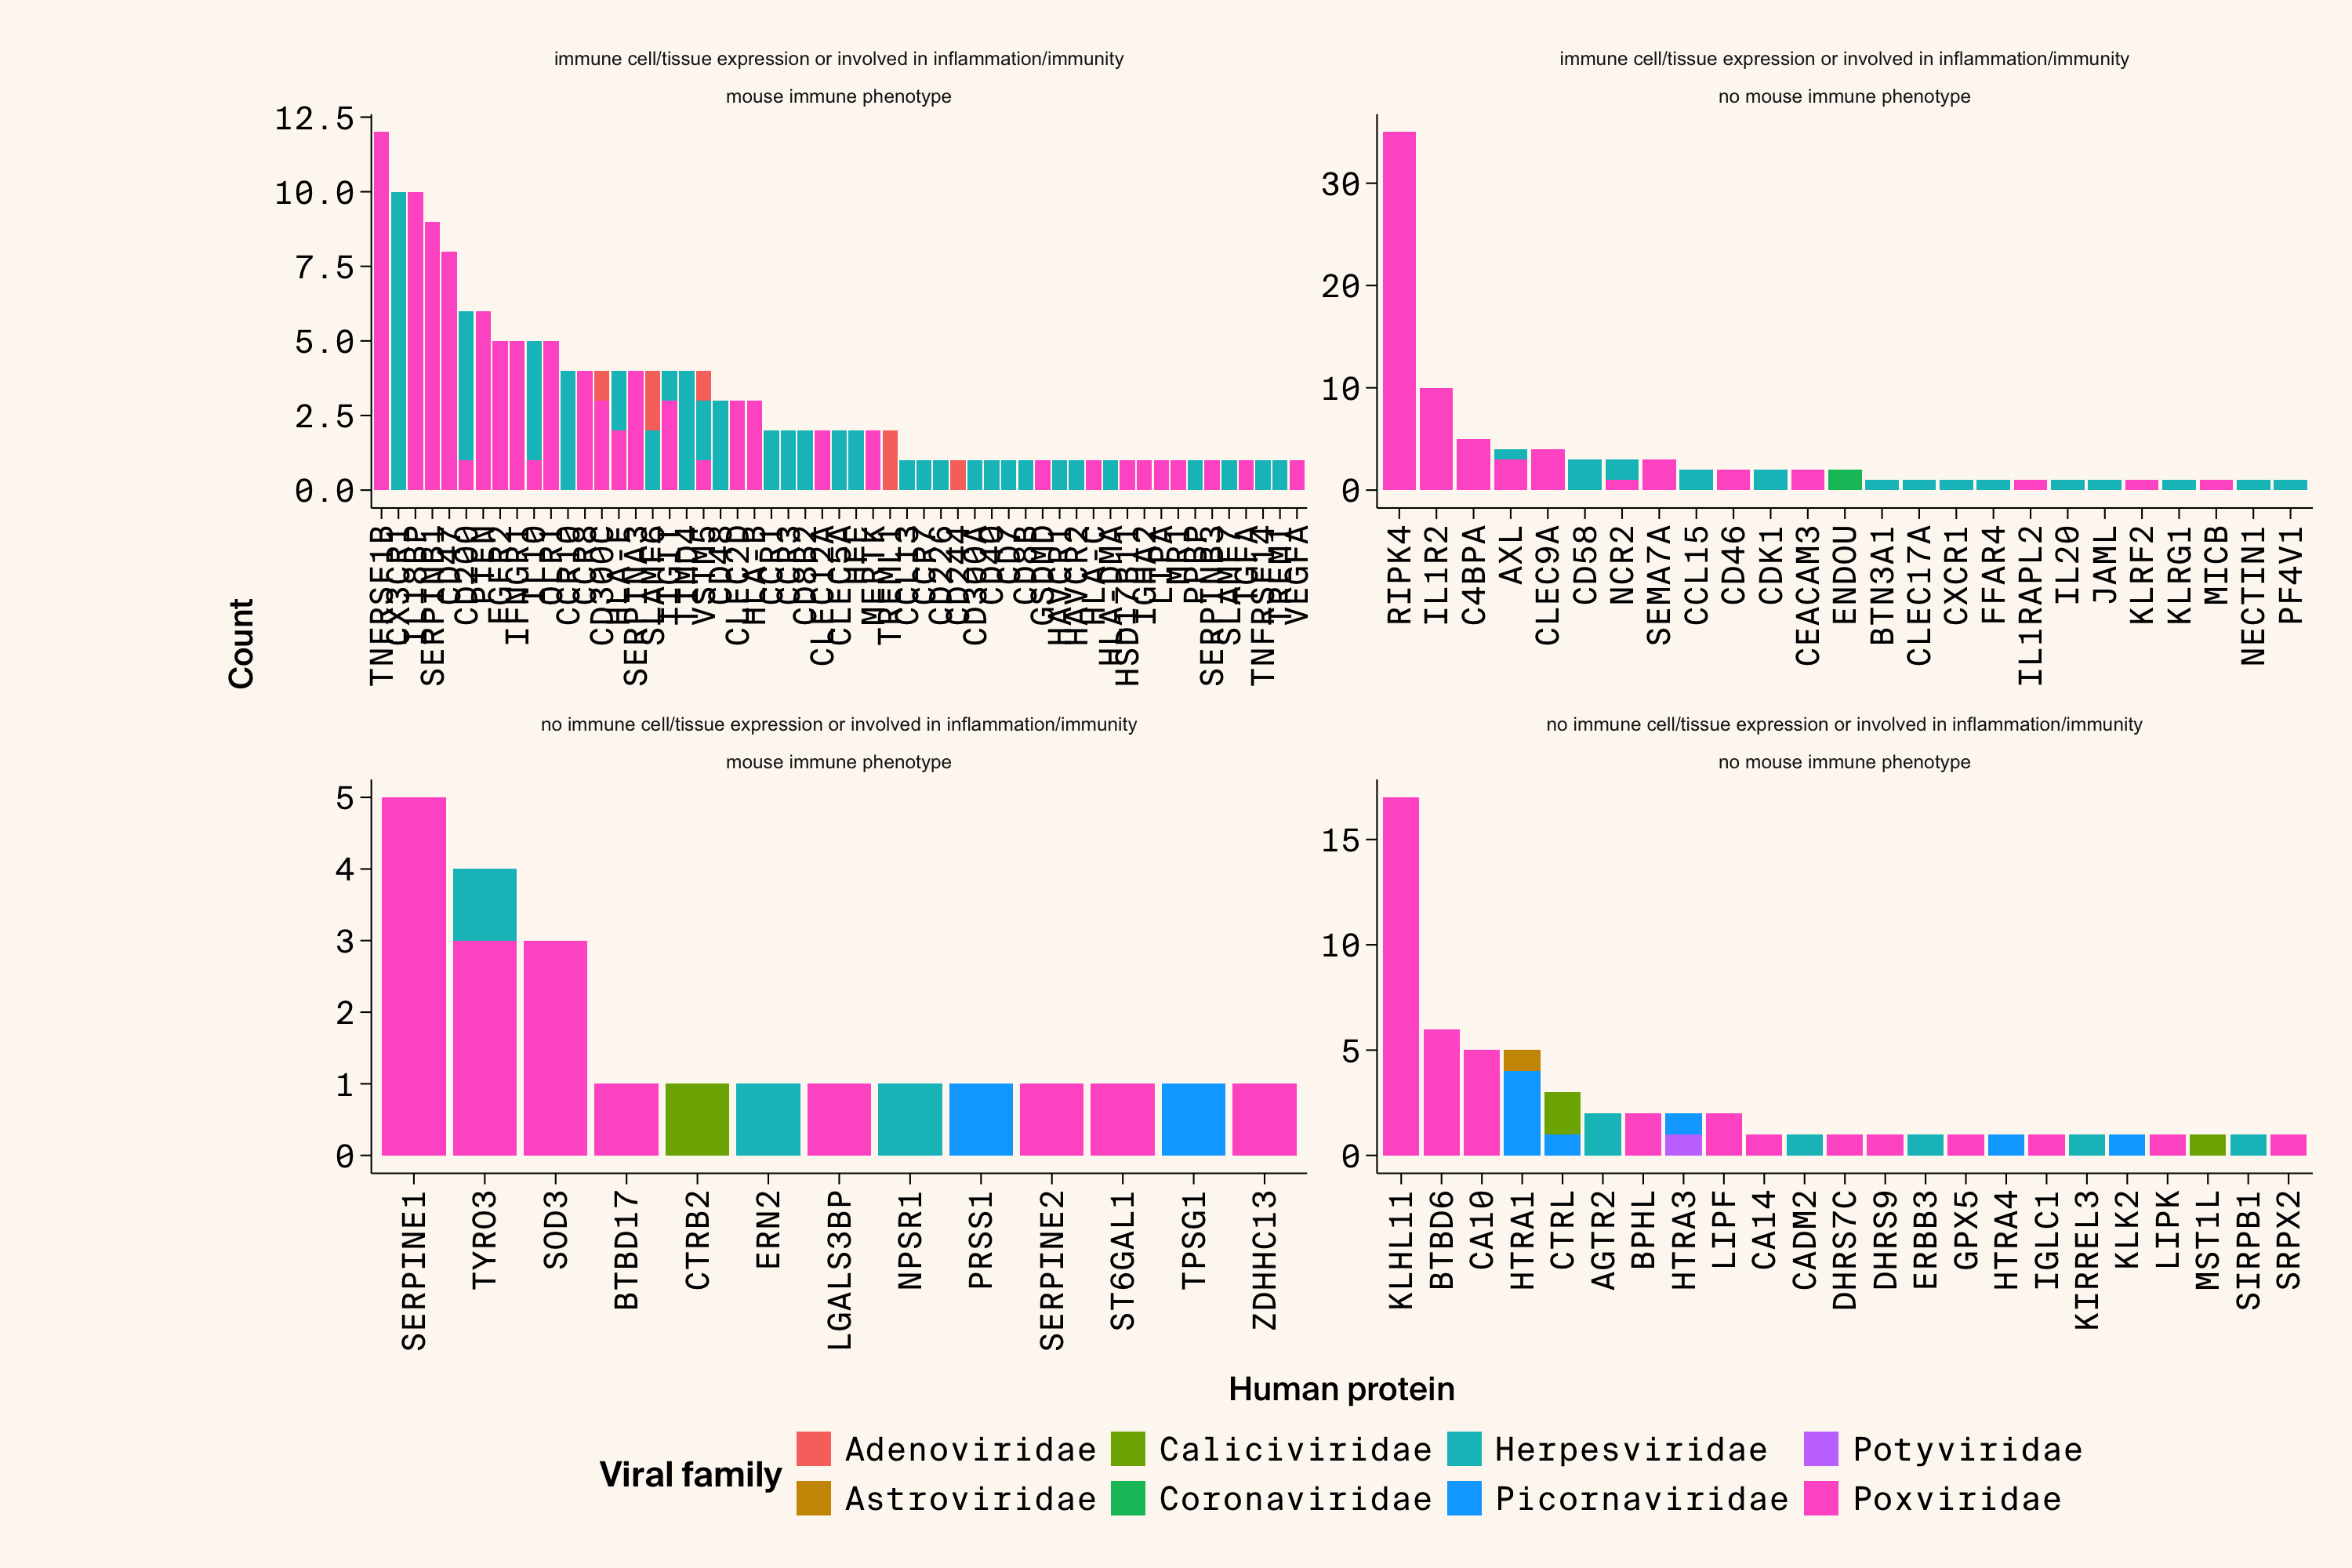

In [91]:
library(grid)
gt = ggplot_gtable(ggplot_build(g))
gt$widths[1] = 6*gt$widths[1]
grid.draw(gt)